# Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import pickle

# Importing the models

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Import the data

In [3]:
dataset=pd.read_csv('Heart.csv')

# Display of top 5 rows

In [4]:
dataset.head()

Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No

# Dropping the columns

In [5]:
dataset=dataset.drop(columns="Unnamed: 0",axis=1)
dataset

Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
0     63    1       typical     145   233    1        2    150      0   
1     67    1  asymptomatic     160   286    0        2    108      1   
2     67    1  asymptomatic     120   229    0        2    129      1   
3     37    1    nonanginal     130   250    0        0    187      0   
4     41    0    nontypical     130   204    0        2    172      0   
..   ...  ...           ...     ...   ...  ...      ...    ...    ...   
298   45    1       typical     110   264    0        0    132      0   
299   68    1  asymptomatic     144   193    1        0    141      0   
300   57    1  asymptomatic     130   131    0        0    115      1   
301   57    0    nontypical     130   236    0        2    174      0   
302   38    1    nonanginal     138   175    0        0    173      0   

     Oldpeak  Slope   Ca        Thal  AHD  
0        2.3      3  0.0       fixed   No  
1        1.5      2  3.0      normal  Yes  
2        2.6      2  2.0  reversable  Yes  
3        3.5      3  0.0      normal   No  
4        1.4      1  0.0      normal   No  
..       ...    ...  ...         ...  ...  
298      1.2      2  0.0  reversable  Yes  
299      3.4      2  2.0  reversable  Yes  
300      1.2      2  1.0  reversable  Yes  
301      0.0      2  1.0      normal  Yes  
302      0.0      1  NaN      normal   No  

[303 rows x 14 columns]


# Feature Description

1. age

2. sex  (1 = male, 0 = female)

3. chest pain type (4 values(Type of chest pain: typical, atypical, nonanginal, asymptomatic)

4. resting blood pressure

5. serum cholesterol in mg/dl

6. fasting blood sugar > 120 mg/dl((1 = true, 0 = false))

7. resting electrocardiographic results (values 0,1,2)

8. maximum heart rate achieved

9. exercise induced angina((1 = yes, 0 = no))

10. oldpeak = ST depression induced by exercise relative to rest

11. the slope of the peak exercise ST segment((1 = up, 2 = flat, 3 = down))

12. number of major vessels (0–3) colored by fluoroscopy

13. thal: 0 = normal; 1 = fixed defect; 2 = reversible defect

14. AHD	Presence of heart disease (Yes = 1, No = 0)


# EDA:-Exploratory Data Analysis

# Information about the data

In [6]:
dataset.shape

(303, 14)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


# statistical information about the data

In [8]:
dataset.describe()

Age         Sex      RestBP        Chol         Fbs     RestECG  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868  131.689769  246.693069    0.148515    0.990099   
std      9.038662    0.467299   17.599748   51.776918    0.356198    0.994971   
min     29.000000    0.000000   94.000000  126.000000    0.000000    0.000000   
25%     48.000000    0.000000  120.000000  211.000000    0.000000    0.000000   
50%     56.000000    1.000000  130.000000  241.000000    0.000000    1.000000   
75%     61.000000    1.000000  140.000000  275.000000    0.000000    2.000000   
max     77.000000    1.000000  200.000000  564.000000    1.000000    2.000000   

            MaxHR       ExAng     Oldpeak       Slope          Ca  
count  303.000000  303.000000  303.000000  303.000000  299.000000  
mean   149.607261    0.326733    1.039604    1.600660    0.672241  
std     22.875003    0.469794    1.161075    0.616226    0.937438  
min     71.000000    0.000000    0.000000    1.000000    0.000000  
25%    133.500000    0.000000    0.000000    1.000000    0.000000  
50%    153.000000    0.000000    0.800000    2.000000    0.000000  
75%    166.000000    1.000000    1.600000    2.000000    1.000000  
max    202.000000    1.000000    6.200000    3.000000    3.000000

# Checking for the null values

In [9]:
dataset.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

# Filling the missing values

In [10]:
median_ca=dataset.Ca.median()
dataset.Ca=dataset.Ca.fillna(median_ca)
dataset

Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
0     63    1       typical     145   233    1        2    150      0   
1     67    1  asymptomatic     160   286    0        2    108      1   
2     67    1  asymptomatic     120   229    0        2    129      1   
3     37    1    nonanginal     130   250    0        0    187      0   
4     41    0    nontypical     130   204    0        2    172      0   
..   ...  ...           ...     ...   ...  ...      ...    ...    ...   
298   45    1       typical     110   264    0        0    132      0   
299   68    1  asymptomatic     144   193    1        0    141      0   
300   57    1  asymptomatic     130   131    0        0    115      1   
301   57    0    nontypical     130   236    0        2    174      0   
302   38    1    nonanginal     138   175    0        0    173      0   

     Oldpeak  Slope   Ca        Thal  AHD  
0        2.3      3  0.0       fixed   No  
1        1.5      2  3.0      normal  Yes  
2        2.6      2  2.0  reversable  Yes  
3        3.5      3  0.0      normal   No  
4        1.4      1  0.0      normal   No  
..       ...    ...  ...         ...  ...  
298      1.2      2  0.0  reversable  Yes  
299      3.4      2  2.0  reversable  Yes  
300      1.2      2  1.0  reversable  Yes  
301      0.0      2  1.0      normal  Yes  
302      0.0      1  0.0      normal   No  

[303 rows x 14 columns]

# Dropping the missing values

In [11]:
dataset.dropna(inplace=True)

In [12]:
dataset.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

# Outlier detection

In [13]:
upper_limit_restbp=dataset.RestBP.mean()+3*dataset.RestBP.std()
print(upper_limit_restbp)
lower_limit_restbp=dataset.RestBP.mean()-3*dataset.RestBP.std()
print(lower_limit_restbp)

184.6814723220607
78.74709910651075


In [14]:
upper_limit_chol=dataset.Chol.mean()+3*dataset.Chol.std()
print(upper_limit_chol)
lower_limit_chol=dataset.Chol.mean()-3*dataset.Chol.std()
print(lower_limit_chol)

402.5164837732202
91.35727037960368


In [15]:
upper_limit_maxhr=dataset.MaxHR.mean()+3*dataset.MaxHR.std()
print(upper_limit_maxhr)
lower_limit_maxhr=dataset.MaxHR.mean()-3*dataset.MaxHR.std()
print(lower_limit_maxhr)

218.28344844953085
81.11854490595088


In [16]:
upper_limit_oldpeak=dataset.Oldpeak.mean()+3*dataset.Oldpeak.std()
print(upper_limit_oldpeak)
lower_limit_oldpeak=dataset.Oldpeak.mean()-3*dataset.Oldpeak.std()
print(lower_limit_oldpeak)

4.5333406758317345
-2.4469619382902064


# Outlier Removal

In [17]:
RestBP=dataset[(dataset.RestBP>lower_limit_restbp)&(dataset.RestBP<upper_limit_restbp)]
Chol=dataset[(dataset.Chol>lower_limit_chol)&(dataset.Chol<upper_limit_chol)]
MaxHR=dataset[(dataset.MaxHR>lower_limit_maxhr)&(dataset.MaxHR<upper_limit_maxhr)]
Oldpeak=dataset[(dataset.Oldpeak>lower_limit_oldpeak)&(dataset.Oldpeak>upper_limit_oldpeak)]

In [18]:
dataset

Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
0     63    1       typical     145   233    1        2    150      0   
1     67    1  asymptomatic     160   286    0        2    108      1   
2     67    1  asymptomatic     120   229    0        2    129      1   
3     37    1    nonanginal     130   250    0        0    187      0   
4     41    0    nontypical     130   204    0        2    172      0   
..   ...  ...           ...     ...   ...  ...      ...    ...    ...   
298   45    1       typical     110   264    0        0    132      0   
299   68    1  asymptomatic     144   193    1        0    141      0   
300   57    1  asymptomatic     130   131    0        0    115      1   
301   57    0    nontypical     130   236    0        2    174      0   
302   38    1    nonanginal     138   175    0        0    173      0   

     Oldpeak  Slope   Ca        Thal  AHD  
0        2.3      3  0.0       fixed   No  
1        1.5      2  3.0      normal  Yes  
2        2.6      2  2.0  reversable  Yes  
3        3.5      3  0.0      normal   No  
4        1.4      1  0.0      normal   No  
..       ...    ...  ...         ...  ...  
298      1.2      2  0.0  reversable  Yes  
299      3.4      2  2.0  reversable  Yes  
300      1.2      2  1.0  reversable  Yes  
301      0.0      2  1.0      normal  Yes  
302      0.0      1  0.0      normal   No  

[301 rows x 14 columns]

# encoding the data:; Categorical to numerical

In [19]:
dataset['ChestPain'].unique()

array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
      dtype=object)

# Column:-ChestPain['typical':'1','asymptomatic':'2','nonanginal':'3','nontypical':'4'

In [20]:
dataset.replace({'ChestPain':{'typical':'1', 'asymptomatic':'2', 'nonanginal':'3', 'nontypical':'4'}},inplace=True)

In [21]:
dataset['Thal'].unique()

array(['fixed', 'normal', 'reversable'], dtype=object)

# column:-Thal['fixed':'1', 'normal':'2', 'reversable':'3']

In [22]:
dataset.replace({'Thal':{'fixed':'1', 'normal':'2', 'reversable':'3'}},inplace=True)

In [23]:
dataset['AHD'].unique()

array(['No', 'Yes'], dtype=object)

# Column:-AHD['No':'0', 'Yes':'1']

In [24]:
dataset.replace({'AHD':{'No':'0', 'Yes':'1'}},inplace=True)

In [25]:
dataset

Age  Sex ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0     63    1         1     145   233    1        2    150      0      2.3   
1     67    1         2     160   286    0        2    108      1      1.5   
2     67    1         2     120   229    0        2    129      1      2.6   
3     37    1         3     130   250    0        0    187      0      3.5   
4     41    0         4     130   204    0        2    172      0      1.4   
..   ...  ...       ...     ...   ...  ...      ...    ...    ...      ...   
298   45    1         1     110   264    0        0    132      0      1.2   
299   68    1         2     144   193    1        0    141      0      3.4   
300   57    1         2     130   131    0        0    115      1      1.2   
301   57    0         4     130   236    0        2    174      0      0.0   
302   38    1         3     138   175    0        0    173      0      0.0   

     Slope   Ca Thal AHD  
0        3  0.0    1   0  
1        2  3.0    2   1  
2        2  2.0    3   1  
3        3  0.0    2   0  
4        1  0.0    2   0  
..     ...  ...  ...  ..  
298      2  0.0    3   1  
299      2  2.0    3   1  
300      2  1.0    3   1  
301      2  1.0    2   1  
302      1  0.0    2   0  

[301 rows x 14 columns]

# Visualize relationships between features

# Visualization of numerical columns

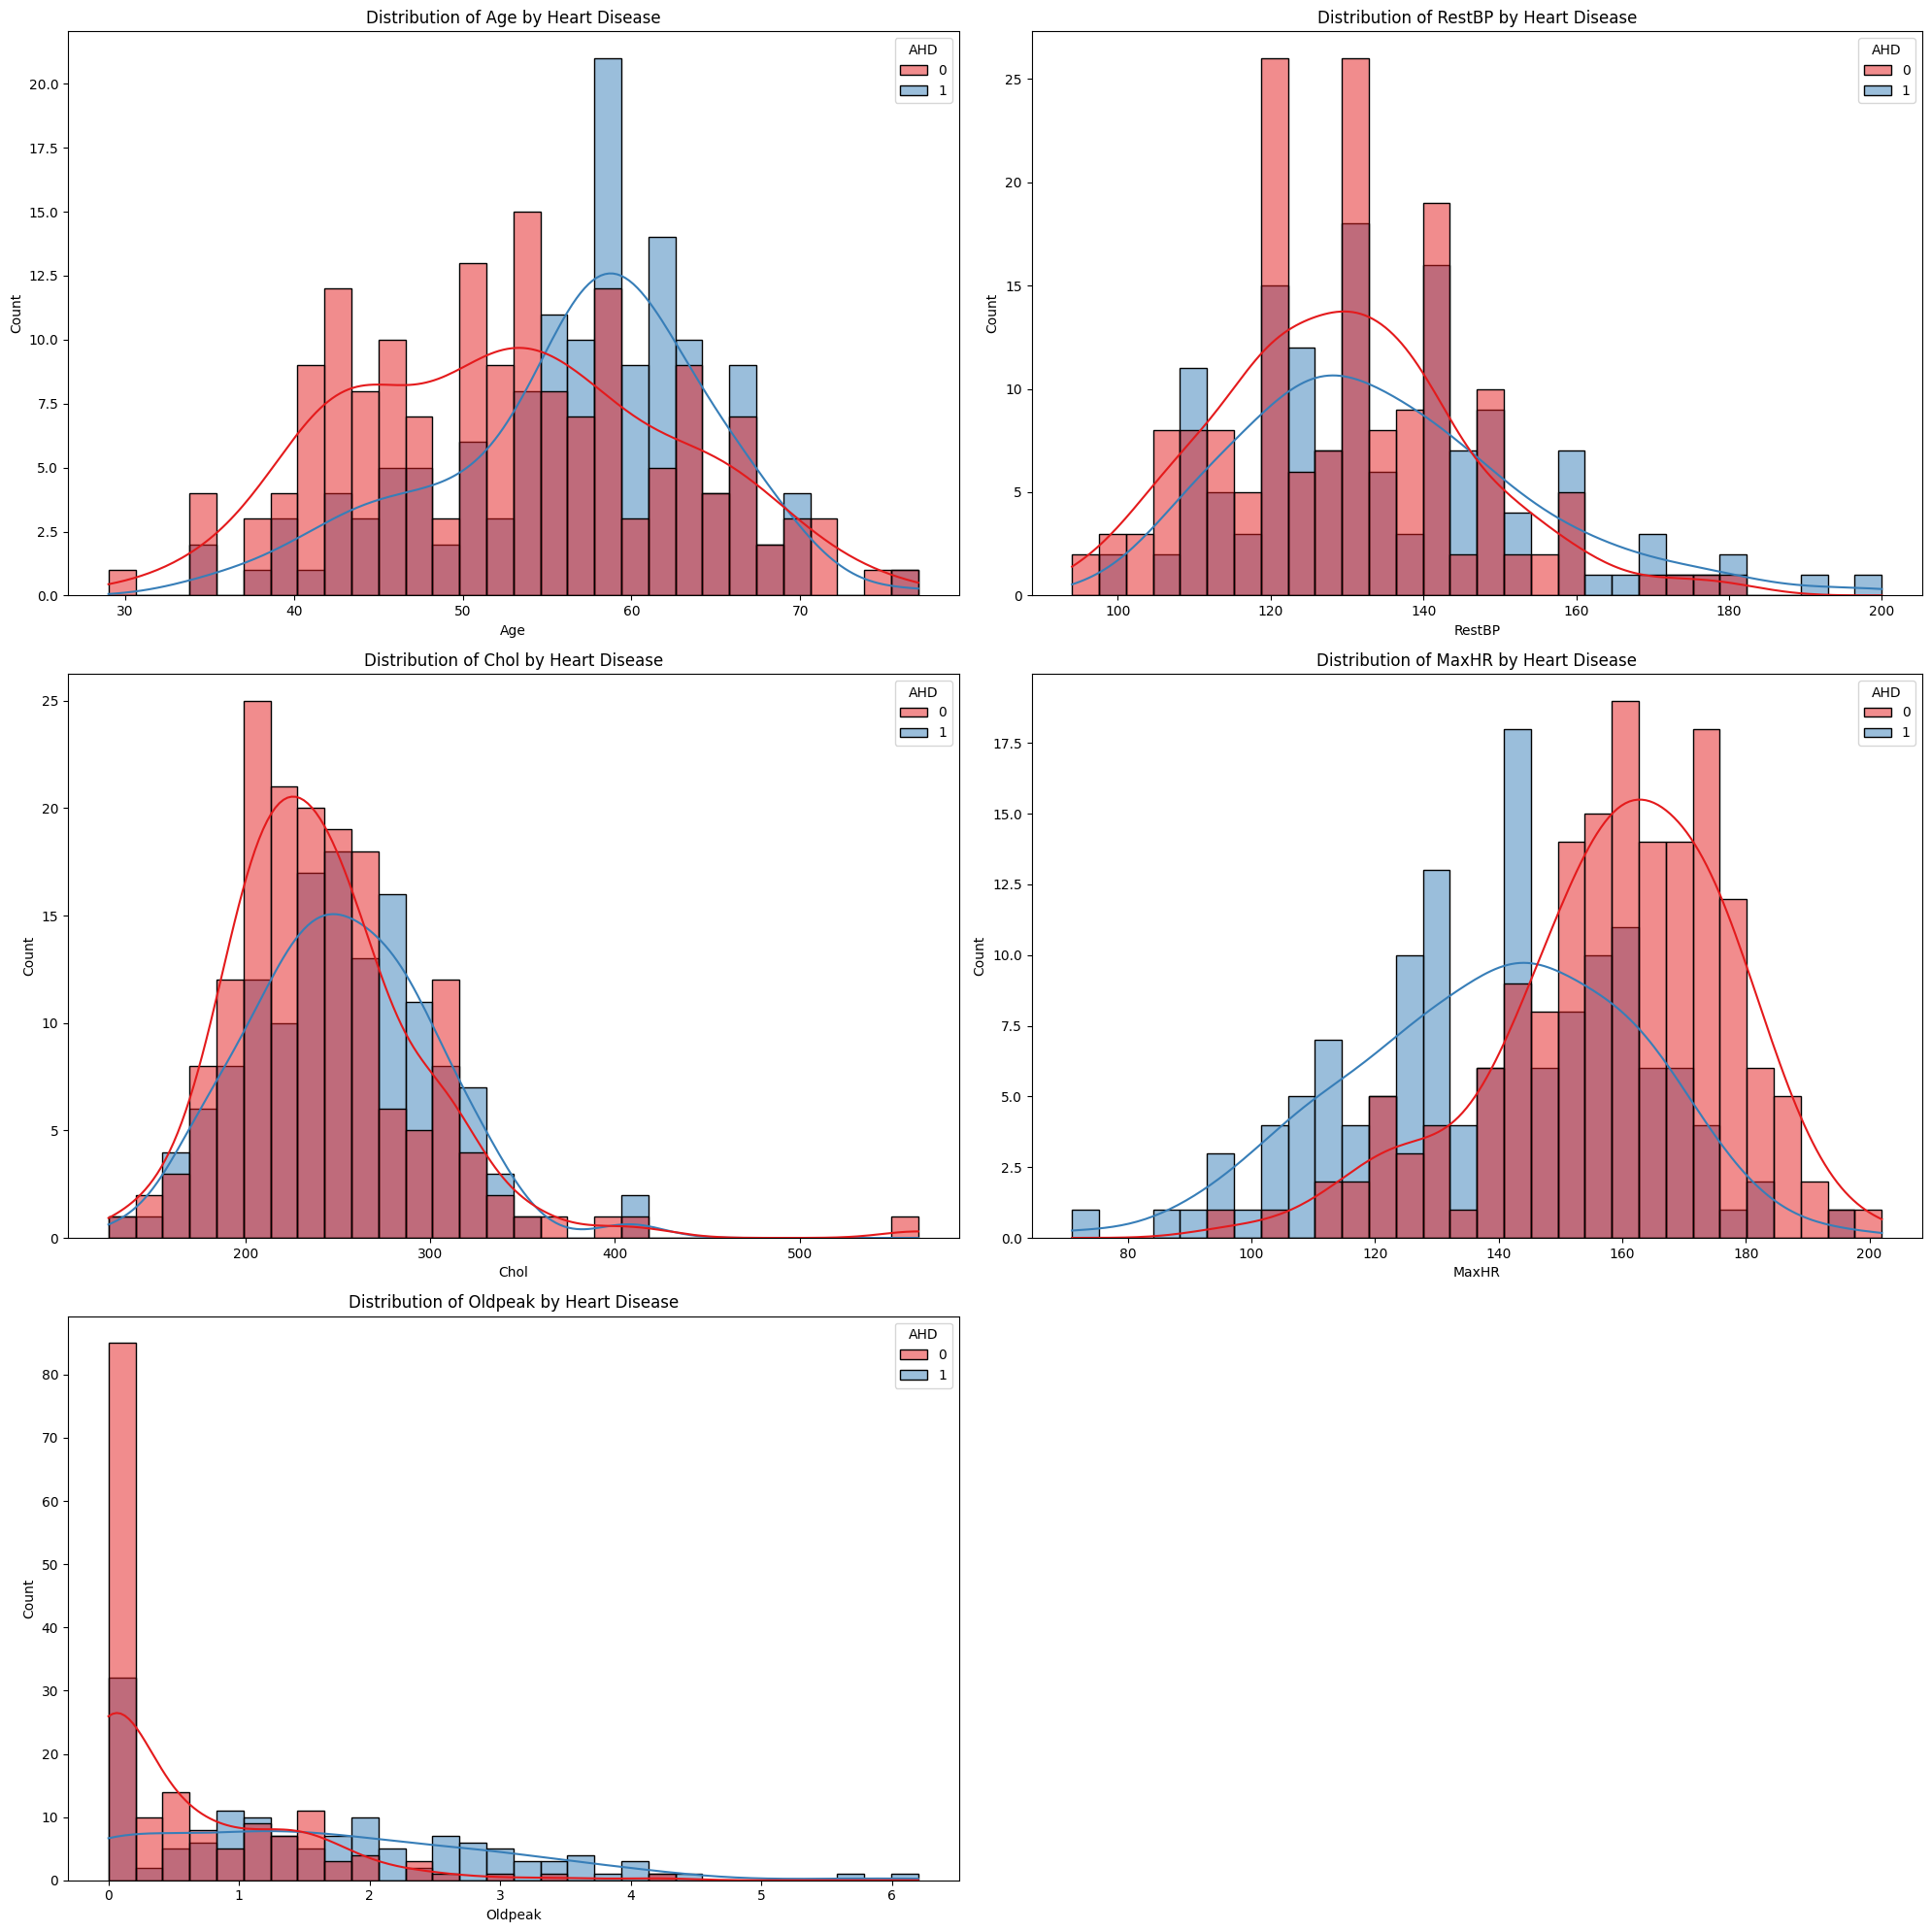

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=dataset, x=col, hue='AHD', kde=True, bins=30, palette='Set1')
    plt.title(f'Distribution of {col} by Heart Disease')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


# 1. Age
May show a peak around 50–60 years.

You might notice that people with heart disease (AHD=Yes) are more concentrated in older age ranges.

2. Resting Blood Pressure (RestBP)
Distribution often peaks around 120–140 mm Hg.

People with heart disease may have slightly higher resting BP, but overlap with non-diseased is common.

3. Cholesterol (Chol)
Wide spread; can go over 300 mg/dL.

High cholesterol may appear in both Yes and No classes, so separation might not be strong.

4. Maximum Heart Rate Achieved (MaxHR)
Usually shows that heart disease patients have lower max heart rates.

This can be a significant visual difference — a useful feature!

5. Oldpeak (ST Depression)
People with heart disease often have higher Oldpeak values.

The No class (healthy) usually clusters around 0.

# visualize for relation between gender and AHD

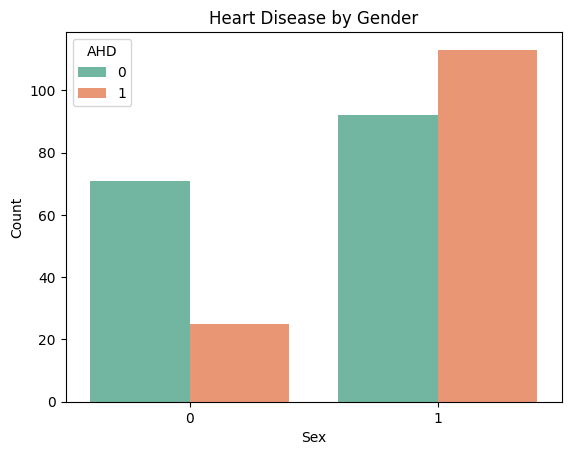

In [27]:
sns.countplot(data=dataset, x='Sex', hue='AHD', palette='Set2')
plt.title('Heart Disease by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='AHD')
plt.show()

# Explanation:
Sex:

0 = Female

1 = Male

AHD:

0 = No heart disease

1 = Has heart disease

Males are more affected by heart disease in your dataset.

# Data Preprocessing

# Seperate independent and dependent feature

In [28]:
x=dataset.drop(columns='AHD',axis=1)
y=dataset['AHD']

In [29]:
print(x)
print(y)

     Age  Sex ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0     63    1         1     145   233    1        2    150      0      2.3   
1     67    1         2     160   286    0        2    108      1      1.5   
2     67    1         2     120   229    0        2    129      1      2.6   
3     37    1         3     130   250    0        0    187      0      3.5   
4     41    0         4     130   204    0        2    172      0      1.4   
..   ...  ...       ...     ...   ...  ...      ...    ...    ...      ...   
298   45    1         1     110   264    0        0    132      0      1.2   
299   68    1         2     144   193    1        0    141      0      3.4   
300   57    1         2     130   131    0        0    115      1      1.2   
301   57    0         4     130   236    0        2    174      0      0.0   
302   38    1         3     138   175    0        0    173      0      0.0   

     Slope   Ca Thal  
0        3  0.0    1  
1        2  3.0  

# Standarized the data to maintain the range of the value

In [30]:
scaler=StandardScaler()
StandardScaler=scaler.fit_transform(x)
print(StandardScaler)

[[ 0.94432161  0.68431914 -1.79592317 ...  2.27113463 -0.7146918
  -2.27795456]
 [ 1.38620393  0.68431914 -0.62837917 ...  0.64735429  2.49608777
  -0.56379375]
 [ 1.38620393  0.68431914 -0.62837917 ...  0.64735429  1.42582791
   1.15036705]
 ...
 [ 0.28149812  0.68431914 -0.62837917 ...  0.64735429  0.35556806
   1.15036705]
 [ 0.28149812 -1.46130649  1.70670884 ...  0.64735429  0.35556806
  -0.56379375]
 [-1.81744291  0.68431914  0.53916484 ... -0.97642605 -0.7146918
  -0.56379375]]


# Assining the new standarized values to x 

In [31]:
x=StandardScaler
y=dataset['AHD']

In [32]:
print(x)
print(y)

[[ 0.94432161  0.68431914 -1.79592317 ...  2.27113463 -0.7146918
  -2.27795456]
 [ 1.38620393  0.68431914 -0.62837917 ...  0.64735429  2.49608777
  -0.56379375]
 [ 1.38620393  0.68431914 -0.62837917 ...  0.64735429  1.42582791
   1.15036705]
 ...
 [ 0.28149812  0.68431914 -0.62837917 ...  0.64735429  0.35556806
   1.15036705]
 [ 0.28149812 -1.46130649  1.70670884 ...  0.64735429  0.35556806
  -0.56379375]
 [-1.81744291  0.68431914  0.53916484 ... -0.97642605 -0.7146918
  -0.56379375]]
0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: AHD, Length: 301, dtype: object


# Splitting the data into training and testing

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [34]:
print(x.shape,x_train.shape,x_test.shape)

(301, 13) (240, 13) (61, 13)


# Comparing the performance of the model with the help of Cross Validation

In [35]:
models=[LogisticRegression(),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier()]
def compare_models_cross_validation():
    for model in models:
        cv_score=cross_val_score(model,x,y,cv=5)
        mean_accuracy=sum(cv_score)/len(cv_score)
        mean_accuracy=mean_accuracy*100
        mean_accuracy=round(mean_accuracy,2)
        print('Cross_validation accuries for',model,'=',cv_score)
        print('Accuracy % of the',model,mean_accuracy)

In [36]:
compare_models_cross_validation()

Cross_validation accuries for LogisticRegression() = [0.80327869 0.86666667 0.78333333 0.83333333 0.83333333]
Accuracy % of the LogisticRegression() 82.4
Cross_validation accuries for SVC(kernel='linear') = [0.7704918  0.88333333 0.76666667 0.85       0.83333333]
Accuracy % of the SVC(kernel='linear') 82.08
Cross_validation accuries for KNeighborsClassifier() = [0.80327869 0.83333333 0.83333333 0.81666667 0.73333333]
Accuracy % of the KNeighborsClassifier() 80.4
Cross_validation accuries for RandomForestClassifier() = [0.7704918  0.86666667 0.85       0.76666667 0.8       ]
Accuracy % of the RandomForestClassifier() 81.08


# Predicting the values of train & test with a single model

In [37]:
model=SVC()
model.fit(x_train,y_train)
x_train_prediction=model.predict(x_train)
model.fit(x_test,y_test)
x_test_prediction=model.predict(x_test)


# Making the confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix

cf_train=confusion_matrix(y_train,x_train_prediction)
print('Confusion_score on Training data:')
print(cf_train)
cf_test=confusion_matrix(y_test,x_test_prediction)
print('Confusion_score on testing data')
print(cf_test)

Confusion_score on Training data:
[[131   6]
 [ 11  92]]
Confusion_score on testing data
[[24  2]
 [ 2 33]]


# information on confusion matrix

[[TN FP]

 [FN TP]]
 
TN = True Negatives (correctly predicted No disease)

FP = False Positives (wrongly predicted disease)

FN = False Negatives (missed disease)

TP = True Positives (correctly predicted disease)

# Precision,recall and f1 score

In [39]:
from sklearn.metrics import precision_score,recall_score,f1_score
def precision_recall_f1_score(true_labels,pred_labels):
    # convert to int in case labels are string '0'/'1'
    true_labels = true_labels.astype(int)
    pred_labels = pred_labels.astype(int)
    precision_value=precision_score(true_labels,pred_labels)
    recall_value=recall_score(true_labels,pred_labels)
    f1_score_value=f1_score(true_labels,pred_labels)
    
    print('precision=',precision_value)
    print('recall=',recall_value)
    print('f1_score=',f1_score_value)

In [40]:
print('Training data:')
precision_recall_f1_score(y_train,x_train_prediction)
print('Testing data:')
precision_recall_f1_score(y_test,x_test_prediction)

Training data:
precision= 0.9387755102040817
recall= 0.8932038834951457
f1_score= 0.9154228855721394
Testing data:
precision= 0.9428571428571428
recall= 0.9428571428571428
f1_score= 0.9428571428571428


# Making a predictive system

In [41]:
# Step 1: Create your input data
input_data = ( 63, 1, "typical", 145, 233, 1, 2, 150, 0, 2.3, 3, 0, "fixed")

# Step 2: Convert it into a DataFrame
input_df = pd.DataFrame([input_data], columns=[
     "Age", "Sex", "ChestPain", "RestBP", "Chol", "Fbs", 
    "RestECG", "MaxHR", "ExAng", "Oldpeak", "Slope", "Ca", "Thal"
])

# Step 3: Apply the same replacements you used during training
input_df.replace({
    'ChestPain': {'typical': '1', 'asymptomatic': '2', 'nonanginal': '3', 'nontypical': '4'},
    'Thal': {'fixed': '1', 'normal': '2', 'reversable': '3'}
}, inplace=True)

#standarize the input data
std_data=scaler.transform(input_df)
prediction=model.predict(std_data)
print(prediction)

['1']


In [42]:
# Save the trained model to a file
with open('heart_disease_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model trained and saved as heart_disease_model.pkl")

Model trained and saved as heart_disease_model.pkl


In [43]:
# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Scaler saved as scaler.pkl")

Scaler saved as scaler.pkl
